In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
import datetime

In [2]:
dc=pd.read_excel(r"C:\Users\Mark 1\tramprd_df_strd.xlsx")
dc = dc.loc[:, ~dc.columns.str.contains('^Unnamed')]
dc.tail()

,date,original_val,mean_based,max_based,mean_max_based,max_mean_based,mean_last_based,last_mean_based,last_based,middle_based
189,2020-10-04,5583431,5346391,5600300,5593036,5353335,5593036,5343109,5589602,5356670
190,2020-10-05,5659286,5428194,5678317,5670000,5436156,5670000,5419781,5661213,5428631
191,2020-10-06,5741231,5506896,5754910,5744275,5517092,5744275,5499127,5736172,5502492
192,2020-10-07,5821401,5585691,5835658,5825469,5595461,5825469,5584631,5824363,5589602
193,2020-10-08,0,5663639,5909021,5904750,5667736,5904750,5661664,5902690,5661213


In [3]:
dce=pd.read_excel(r"C:\Users\Mark 1\tramerrprd_df_strd.xlsx")
dce = dce.loc[:, ~dce.columns.str.contains('^Unnamed')]
errdf=dce=dce.loc[:,["date","mb","mxb","mxb","memb","mxmb","mlb","lmb","lb","mdb"]]
errdf.tail()

,date,mb,mxb,mxb,memb,mxmb,mlb,lmb,lb,mdb
189,2020-10-04,237040,-16869,-16869,-9605,230096,-9605,240322,-6171,226761
190,2020-10-05,231092,-19031,-19031,-10714,223130,-10714,239505,-1927,230655
191,2020-10-06,234335,-13679,-13679,-3044,224139,-3044,242104,5059,238739
192,2020-10-07,235710,-14257,-14257,-4068,225940,-4068,236770,-2962,231799
193,2020-10-08,-5663639,-5909021,-5909021,-5904750,-5667736,-5904750,-5661664,-5902690,-5661213


In [4]:
erdt=pd.read_excel(r"C:\Users\Mark 1\trerr_df.xlsx")
erdt = erdt.loc[:, ~erdt.columns.str.contains('^Unnamed')]
erdt['original_val']=erdt['original_val'].astype('int')
erdt['date']=erdt['date'].astype('datetime64[ns]')
erdt.tail()

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
189,2020-10-04,mdb,lb,226761,-6171,5583431,5356670,5589602
190,2020-10-05,mxmb,lb,223130,-1927,5659286,5436156,5661213
191,2020-10-06,lb,memb,5059,-3044,5741231,5736172,5744275
192,2020-10-07,mxmb,lb,225940,-2962,5821401,5595461,5824363
193,2020-10-08,No,mdb,No,-5661213,0,No,5661213


In [5]:
erdtpv=erdt[erdt['mipv']!='No']
erdtpv['mipe']=erdtpv['mipe'].astype('str')
erdtpv['mipv']=erdtpv['mipv'].astype('int')
erdtpv['pprd_val']=erdtpv['pprd_val'].astype('int')
erdtpv

<ipython-input-5-ba78fec52151>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipe']=erdtpv['mipe'].astype('str')
<ipython-input-5-ba78fec52151>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipv']=erdtpv['mipv'].astype('int')
<ipython-input-5-ba78fec52151>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
0,2020-03-31,mxmb,memb,28,-26,150,122,176
1,2020-04-01,lb,memb,5,-13,169,164,182
2,2020-04-02,lb,memb,1,-16,191,190,207
3,2020-04-03,lb,memb,14,-3,230,216,233
4,2020-04-04,lb,mxb,9,-23,286,277,309
...,...,...,...,...,...,...,...,...
188,2020-10-03,lb,memb,4502,-6329,5506718,5502216,5513047
189,2020-10-04,mdb,lb,226761,-6171,5583431,5356670,5589602
190,2020-10-05,mxmb,lb,223130,-1927,5659286,5436156,5661213
191,2020-10-06,lb,memb,5059,-3044,5741231,5736172,5744275


In [6]:
erdtnv=erdt[erdt['mxnv']!='No']
erdtnv['mxne']=erdtnv['mxne'].astype('str')
erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
erdtnv['nprd_val']=erdtnv['nprd_val'].astype('int')
erdtnv

<ipython-input-6-532af38dbbcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxne']=erdtnv['mxne'].astype('str')
<ipython-input-6-532af38dbbcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
<ipython-input-6-532af38dbbcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
0,2020-03-31,mxmb,memb,28,-26,150,122,176
1,2020-04-01,lb,memb,5,-13,169,164,182
2,2020-04-02,lb,memb,1,-16,191,190,207
3,2020-04-03,lb,memb,14,-3,230,216,233
4,2020-04-04,lb,mxb,9,-23,286,277,309
...,...,...,...,...,...,...,...,...
189,2020-10-04,mdb,lb,226761,-6171,5583431,5356670,5589602
190,2020-10-05,mxmb,lb,223130,-1927,5659286,5436156,5661213
191,2020-10-06,lb,memb,5059,-3044,5741231,5736172,5744275
192,2020-10-07,mxmb,lb,225940,-2962,5821401,5595461,5824363


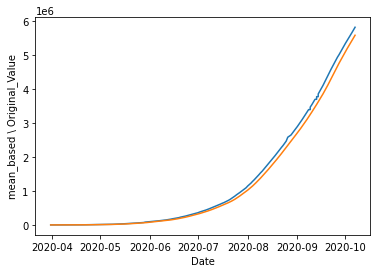

In [7]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("mean_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

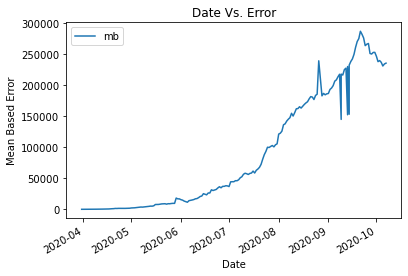

In [8]:
errdf[:len(errdf)-1].plot(x="date",y="mb")
plt.xlabel("Date")
plt.ylabel("Mean Based Error")
plt.title("Date Vs. Error")


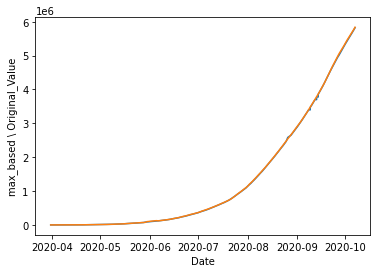

In [9]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("max_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['max_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

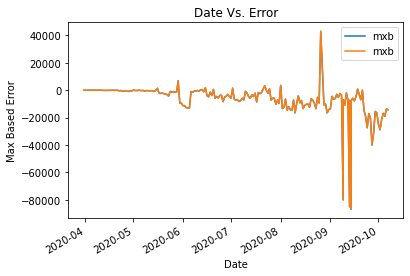

In [10]:
errdf[:len(errdf)-1].plot(x="date",y="mxb")
plt.xlabel("Date")
plt.ylabel("Max Based Error")
plt.title("Date Vs. Error")


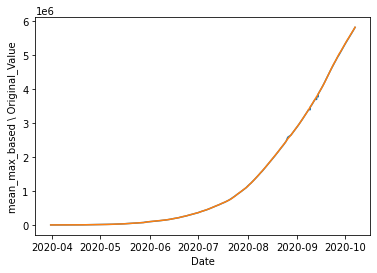

In [11]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("mean_max_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_max_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

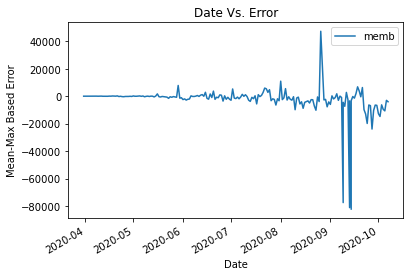

In [12]:
errdf[:len(errdf)-1].plot(x="date",y="memb")
plt.xlabel("Date")
plt.ylabel("Mean-Max Based Error")
plt.title("Date Vs. Error")


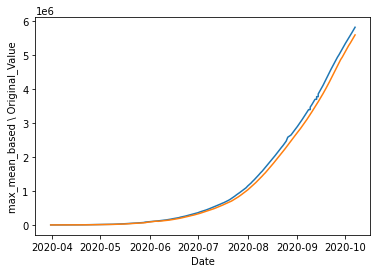

In [13]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("max_mean_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['max_mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

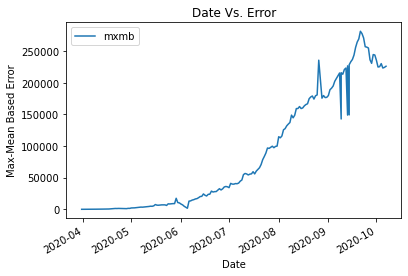

In [14]:
errdf[:len(errdf)-1].plot(x="date",y="mxmb")
plt.xlabel("Date")
plt.ylabel("Max-Mean Based Error")
plt.title("Date Vs. Error")


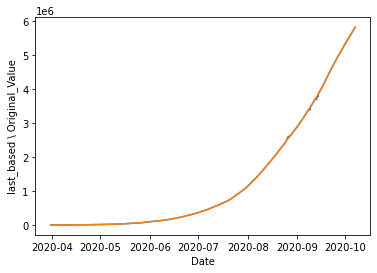

In [15]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("last_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['last_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

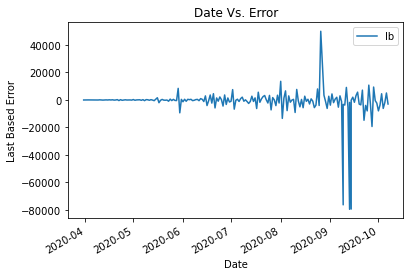

In [16]:
errdf[:len(errdf)-1].plot(x="date",y="lb")
plt.xlabel("Date")
plt.ylabel("Last Based Error")
plt.title("Date Vs. Error")


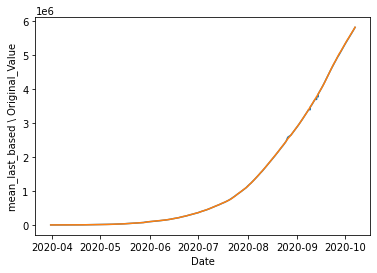

In [17]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("mean_last_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_last_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

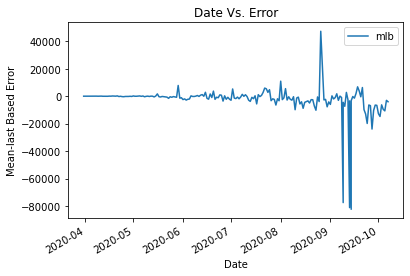

In [18]:
errdf[:len(errdf)-1].plot(x="date",y="mlb")
plt.xlabel("Date")
plt.ylabel("Mean-last Based Error")
plt.title("Date Vs. Error")


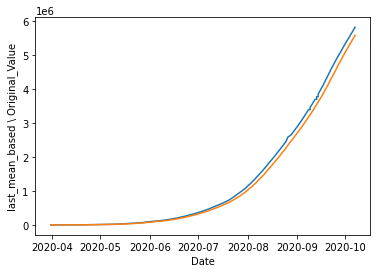

In [19]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("last_mean_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['last_mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

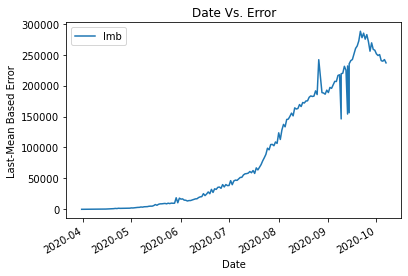

In [20]:
errdf[:len(errdf)-1].plot(x="date",y="lmb")
plt.xlabel("Date")
plt.ylabel("Last-Mean Based Error")
plt.title("Date Vs. Error")


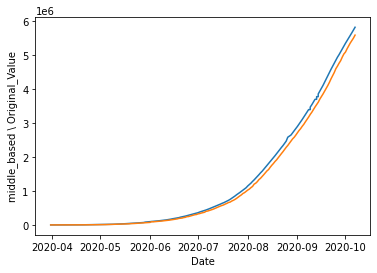

In [21]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("middle_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['middle_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

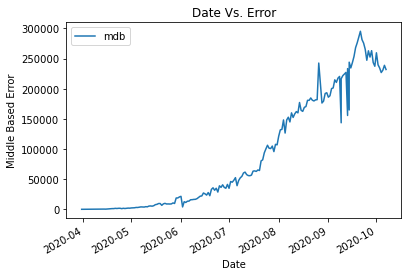

In [22]:
errdf[:len(errdf)-1].plot(x="date",y="mdb")
plt.xlabel("Date")
plt.ylabel("Middle Based Error")
plt.title("Date Vs. Error")


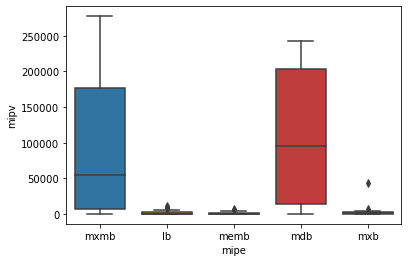

In [23]:
sns.boxplot(x='mipe',y='mipv',data=erdtpv,width=0.75)


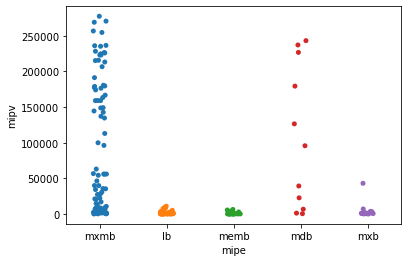

In [24]:
sns.stripplot(x='mipe',y='mipv',data=erdtpv,jitter=True)

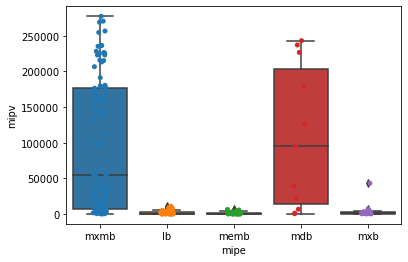

In [25]:
sns.boxplot(x='mipe',y='mipv',data=erdtpv)

sns.stripplot(x='mipe',y='mipv',data=erdtpv,jitter=True)

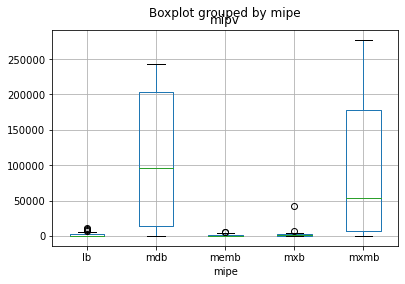

In [26]:
erdtpv.boxplot(by='mipe', column=['mipv'], grid=True)

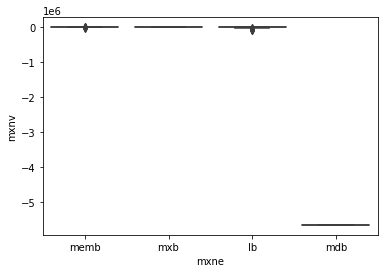

In [27]:
sns.boxplot(x='mxne',y='mxnv',data=erdtnv)

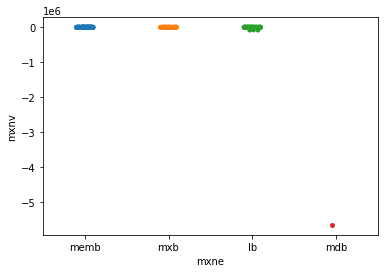

In [28]:
sns.stripplot(x='mxne',y='mxnv',data=erdtnv,jitter=True)

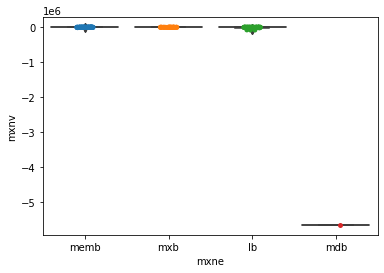

In [29]:
sns.boxplot(x='mxne',y='mxnv',data=erdtnv)
sns.stripplot(x='mxne',y='mxnv',data=erdtnv,jitter=True)

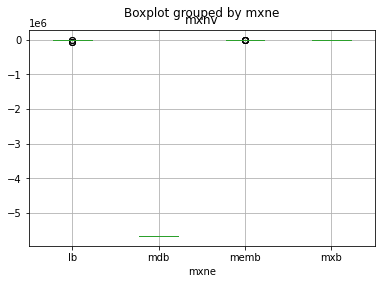

In [30]:
erdtnv.boxplot(by='mxne', column=['mxnv'], grid=True)